In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import math

In [2]:
import os

In [3]:
df = pd.read_csv("../data/reviews.csv")

In [4]:
df.columns

Index(['Header', 'Author', 'Date Published', 'Review Body',
       'Type of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Ground Service', 'Value for Money',
       'Recommended'],
      dtype='object')

In [5]:
df.head()

,Header,Author,Date Published,Review Body,Type of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value for Money,Recommended
0,"""Absolute worst travel experience""",S Drew,2024-07-30,British Airways oversold my LHR to LAX flight;...,NaN,Economy Class,London to Los Angeles via Paris CDG,July 2024,1.0,1.0,1.0,1,no
1,"""one of the worst airlines""",Tim Taylor,2024-07-30,"I travelled London to Doha on July 16th, I had...",NaN,Business Class,London Heathrow to Doha,July 2024,5.0,1.0,1.0,1,no
2,"""my travel pram confiscated from me""",M Raulin,2024-07-28,When dropping off my luggage at the luggage dr...,NaN,Economy Class,Toulouse to London Heathrow,July 2024,1.0,1.0,1.0,1,no
3,“VERY uncomfortable seats”,M Owen,2024-07-19,If you can’t fly First Class don’t fly British...,NaN,Economy Class,San Diego to London,July 2024,1.0,1.0,1.0,1,no
4,"""substandard business class experience""",Bryan Fisk,2024-07-16,Singapore to Heathrow. Business class on an A3...,NaN,Business Class,Singapore to London,July 2024,3.0,2.0,5.0,2,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Header               3828 non-null   object 
 1   Author               3828 non-null   object 
 2   Date Published       3828 non-null   object 
 3   Review Body          3827 non-null   object 
 4   Type of Traveller    0 non-null      float64
 5   Seat Type            3827 non-null   object 
 6   Route                3053 non-null   object 
 7   Date Flown           3050 non-null   object 
 8   Seat Comfort         3705 non-null   float64
 9   Cabin Staff Service  3692 non-null   float64
 10  Ground Service       2979 non-null   float64
 11  Value for Money      3828 non-null   int64  
 12  Recommended          3828 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 388.9+ KB


In [7]:
df.isnull().sum()

Header                    0
Author                    0
Date Published            0
Review Body               1
Type of Traveller      3828
Seat Type                 1
Route                   775
Date Flown              778
Seat Comfort            123
Cabin Staff Service     136
Ground Service          849
Value for Money           0
Recommended               0
dtype: int64

In [8]:
df = df.drop('Type of Traveller', axis=1)

In [9]:
df['Author'].unique()

array(['S Drew', 'Tim Taylor', 'M Raulin', ..., 'S Luqman',
       'Avril Barclay', 'C Volz'], dtype=object)

In [10]:
df['Rating'] = np.ceil(df[['Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Value for Money']].mean(axis=1))

In [11]:
df['Rating'].nunique()

5

### Data cleaning

In [12]:
for index,text in enumerate(df['Review Body'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 BA created a new low-cost subsidiary in BA Euroflyer for flights out of London Gatwick. From a passenger point of view this is meant to mean no difference in service from BA mainline short-haul out of Heathrow. However it is most definitely inferior. Firstly is the seats - BA promised to keep their old much more comfortable Pinnacle seats up to row 12 in their refurbishment of these planes with slimline seats, however at BA Euroflyer it seems the whole plane has these installed on some planes. Despite snagging a seat in row 10, we ended up still with those horrible back breaking seats that have no lumbar support and no headrests. One positive of the new seats was meant to be at-seat power to charge devices, but this didn't have that either. The onboard service is meant to include some complimentary food and drink, namely a sweet or savoury snack and a small bottle of Harrogate Spa water. What we got was horrible Nairn's Raisin Oat biscuits, without asking if we'd like the ot

In [13]:
contractions_dict = { "ain't": "are not","british arways":"ba","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [14]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [15]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [16]:
# Expanding Contractions in the reviews
df['Review Body'].fillna('', inplace=True)
df['Review Body']=df['Review Body'].apply(lambda x:expand_contractions(x))

/tmp/ipykernel_3648848/512018543.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Body'].fillna('', inplace=True)


In [17]:
#lowercase the reviews
df['cleaned']=df['Review Body'].apply(lambda x: x.lower())

In [18]:
#remove punctuations
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_3648848/168416431.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [19]:
#remove extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [20]:
for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 ba created a new lowcost subsidiary in ba euroflyer for flights out of london gatwick from a passenger point of view this is meant to mean no difference in service from ba mainline shorthaul out of heathrow however it is most definitely inferior firstly is the seats  ba promised to keep their old much more comfortable pinnacle seats up to row  in their refurbishment of these planes with slimline seats however at ba euroflyer it seems the whole plane has these installed on some planes despite snagging a seat in row  we ended up still with those horrible back breaking seats that have no lumbar support and no headrests one positive of the new seats was meant to be atseat power to charge devices but this did not have that either the onboard service is meant to include some complimentary food and drink namely a sweet or savoury snack and a small bottle of harrogate spa water what we got was horrible nairn is raisin oat biscuits without asking if we would like the other choice and

### Preparing text data for EDA

In [21]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [22]:
df.columns

Index(['Header', 'Author', 'Date Published', 'Review Body', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Ground Service', 'Value for Money', 'Recommended', 'Rating', 'cleaned',
       'lemmatized'],
      dtype='object')

In [23]:
df_grouped=df[['Rating','lemmatized']].groupby(by='Rating').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
Rating,
1.0,british airways oversell lhr lax flight book m...
2.0,travel london doha july physically check ba ...
3.0,singapore heathrow business class premium ec...
4.0,route fly regularly class security lounge good...
5.0,pleasant time flight friendly helpful staff gu...


In [24]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,ab,aback,abandon,abandondone,abba,abbreviate,abc,abd,abdication,...,zoo,zrh,zrhlhr,zuletzt,zum,zurich,zusammenschluss,zürich,álex,über
Rating,,,,,,,,,,,,,,,,,,,,,
1.0,6,0,0,6,0,1,0,0,0,0,...,0,1,0,0,0,6,0,0,0,0
2.0,16,0,0,9,1,1,0,1,1,1,...,4,0,2,1,1,14,1,0,0,1
3.0,17,0,1,3,0,0,1,0,0,0,...,1,0,0,0,0,12,0,0,1,0


### Wordcloud

In [25]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

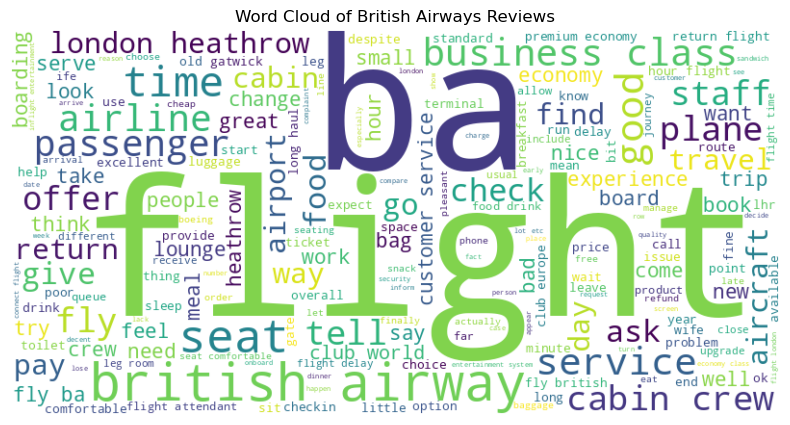

In [26]:
# Word Cloud Visualization
all_text = " ".join(df["lemmatized"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of British Airways Reviews")
plt.show()

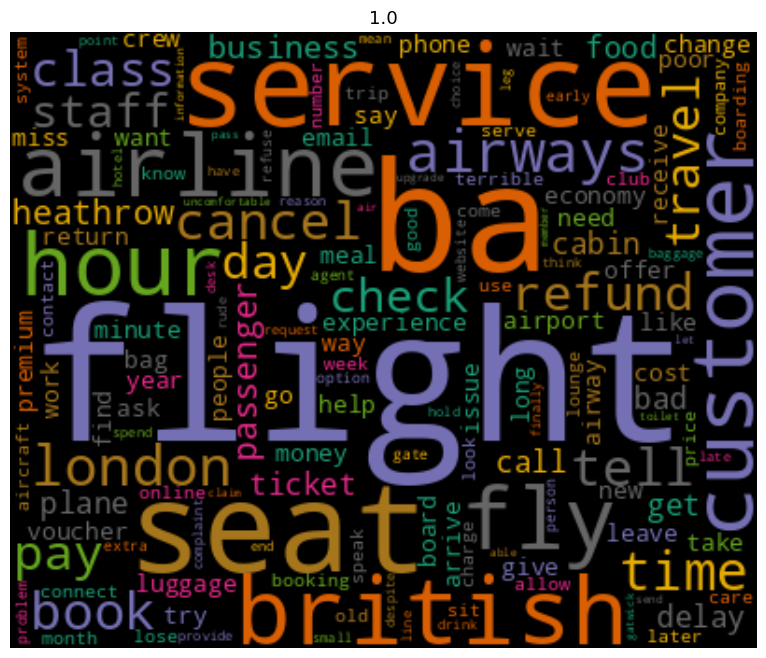

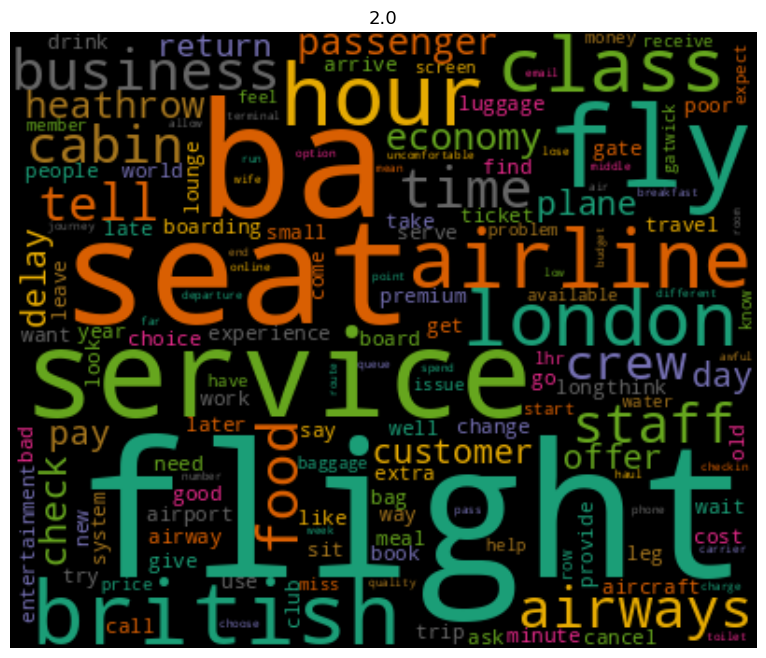

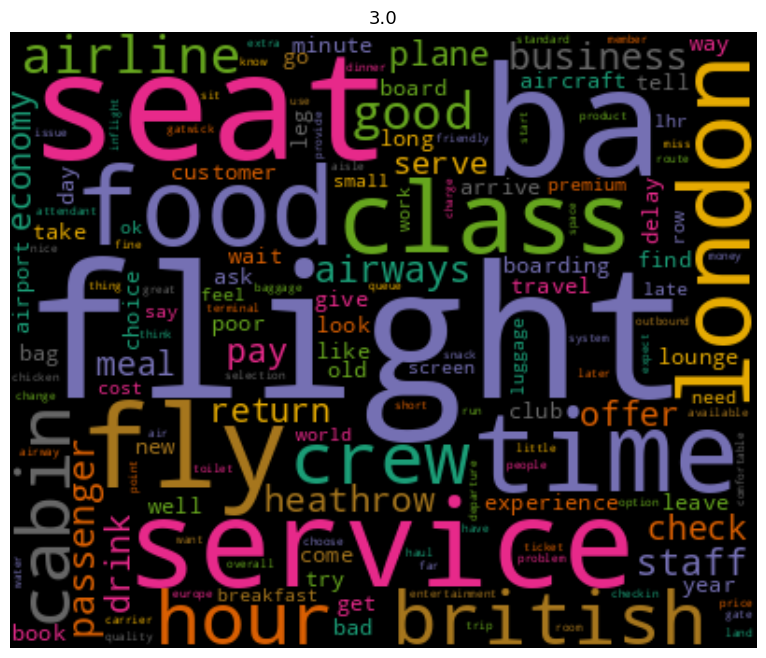

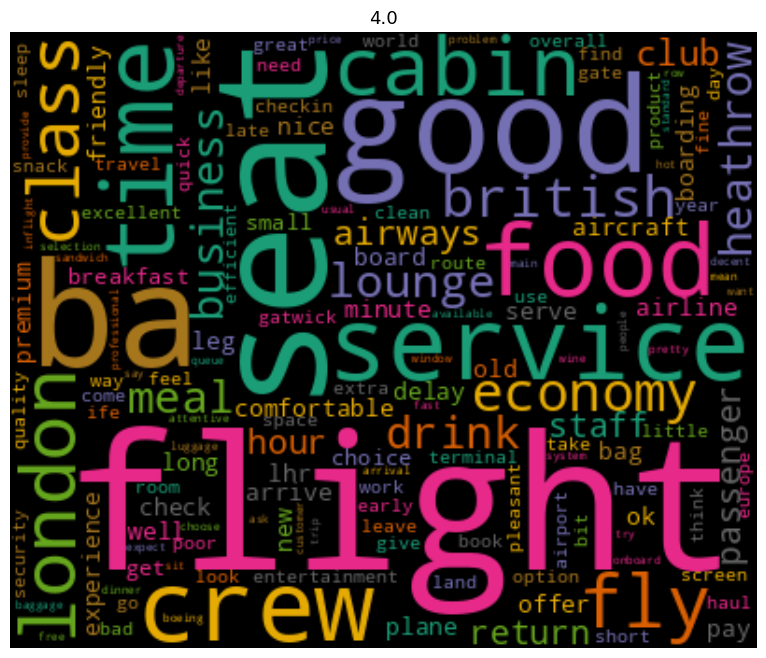

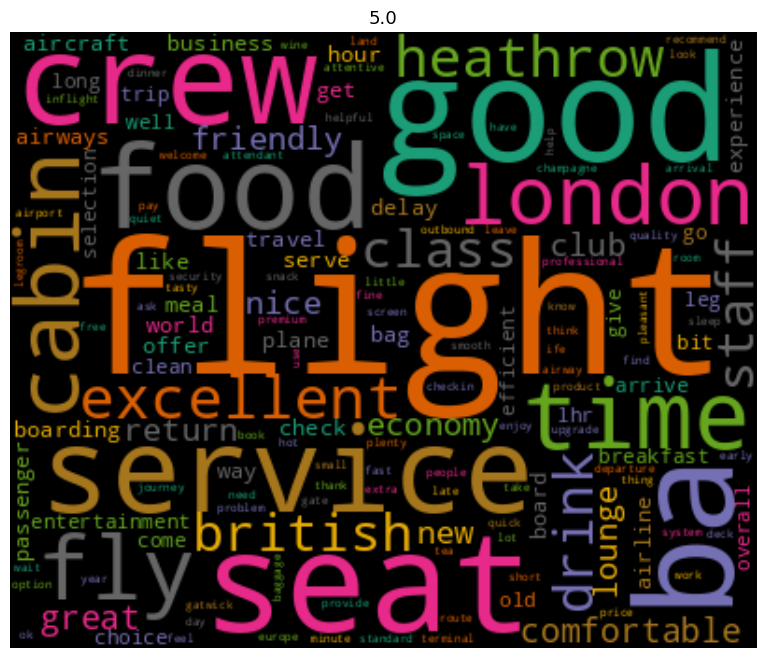

In [27]:
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")

# Ensure title is a string and wrap it
  wrapped_title = '\n'.join(wrap(str(title), 60))
  
  # Set the plot title
  plt.title(wrapped_title, fontsize=13)
  plt.show()

# Remove columns where all values are zero
non_null_df = df_dtm.loc[:, (df_dtm != 0).any(axis=0)]

# Transposing document term matrix
df_dtm = non_null_df.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  title = str(product)
  generate_wordcloud(df_dtm[product].sort_values(ascending=False), title)

In [28]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [29]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['Review Body']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 Los Angeles to Amsterdam via London. Due to delayed take off I risked missing my connecting flight. Thanks to the excellent premium host service, Julie and her colleague, I managed to be on time! Thank you very much.
Review 2:
 Gatwick to St Lucia. Great service on this flight. Thank you very much for the cabin and the great cabin crew. Excellent Service.
Review 3:
 Flew BA 025 Heathrow to Hong Kong in First Class seated in 1A July 2nd 2014. Great flight great service and cabin crew were excellent. I have flown this sector many times and this is one of best flights that I have had on BA.


In [30]:
df['subjectivity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [31]:
df['subjectivity']

0       0.420000
1       0.496340
2       0.417108
3       0.809091
4       0.572500
          ...   
3823    0.361250
3824    0.500000
3825    0.292857
3826    0.440000
3827    0.522704
Name: subjectivity, Length: 3828, dtype: float64

In [32]:
import transformers

In [33]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = df['lemmatized'].tolist()
results = sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/home/grace-nyutu/.local/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [34]:
# Add results to the DataFrame
df['sentiment'] = [result['label'] for result in results]
df['score'] = [result['score'] for result in results]

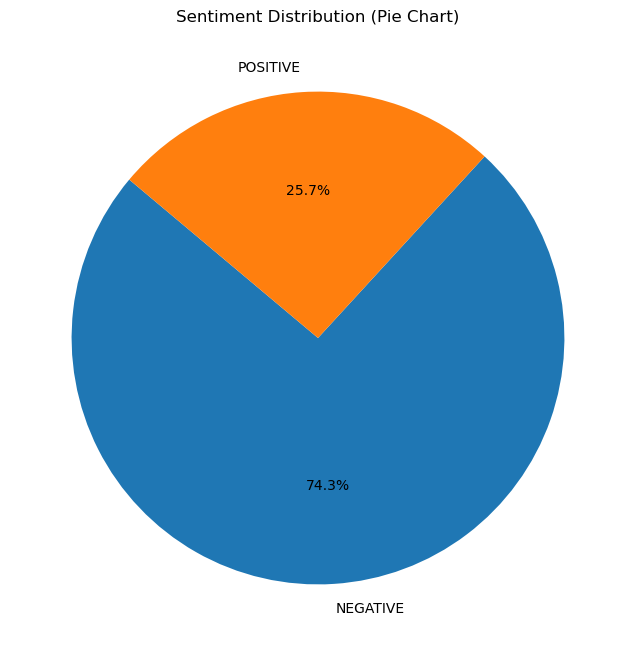

In [65]:
# Pie chart for sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution (Pie Chart)')
plt.show()

In [36]:
df.columns

Index(['Header', 'Author', 'Date Published', 'Review Body', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Ground Service', 'Value for Money', 'Recommended', 'Rating', 'cleaned',
       'lemmatized', 'polarity', 'subjectivity', 'sentiment', 'score'],
      dtype='object')

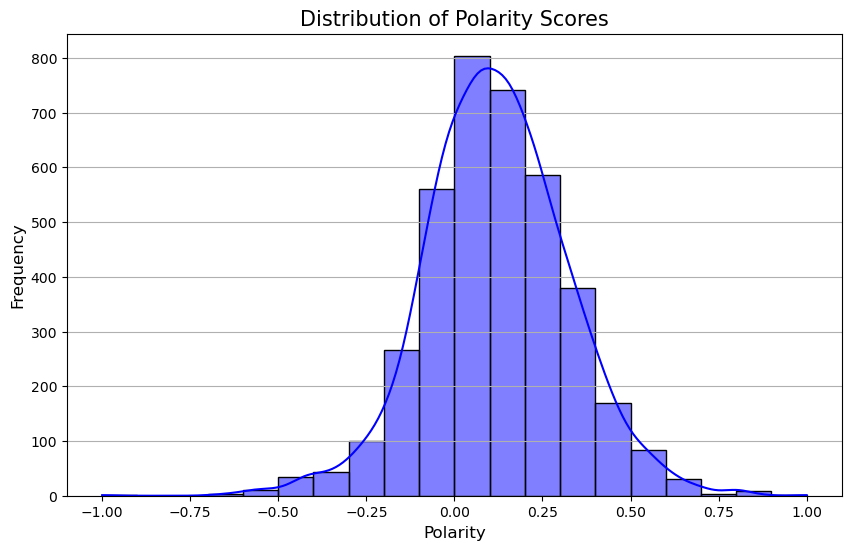

In [64]:
# Plot histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Polarity Scores', fontsize=15)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

/tmp/ipykernel_3648848/1780219837.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Seat Type', y='polarity', data=df, ci=None, palette='flag')
/tmp/ipykernel_3648848/1780219837.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seat Type', y='polarity', data=df, ci=None, palette='flag')


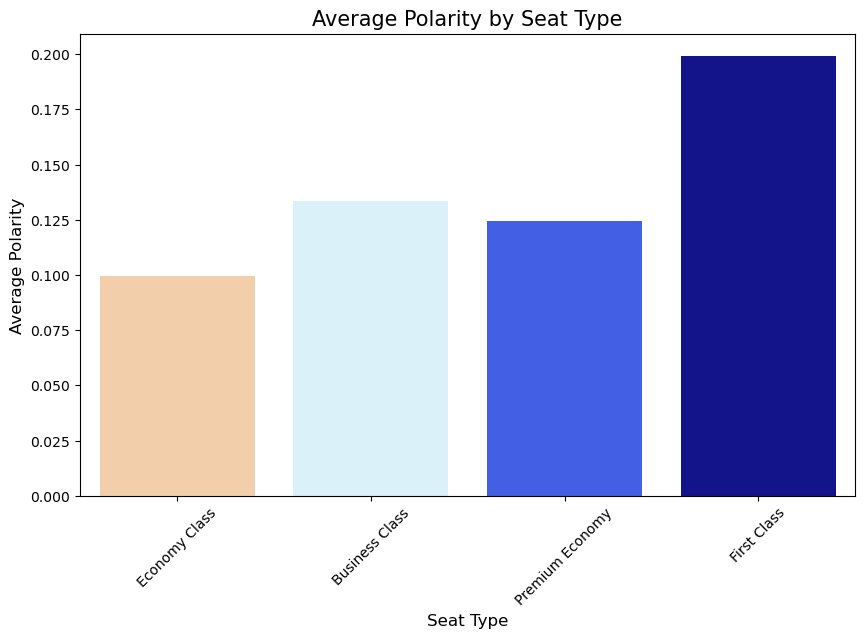

In [63]:
# Average polarity by seat type
plt.figure(figsize=(10, 6))
sns.barplot(x='Seat Type', y='polarity', data=df, ci=None, palette='flag')
plt.title('Average Polarity by Seat Type', fontsize=15)
plt.xlabel('Seat Type', fontsize=12)
plt.ylabel('Average Polarity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [66]:
def plot_rating_boxplots(df):
    rating_cols = ['Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Value for Money']
    
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=df[rating_cols], palette='flag')
    plt.title('Box Plot of Rating Features')
    plt.xlabel('Rating Categories')
    plt.ylabel('Rating')
    plt.xticks(rotation=45)
    plt.show()

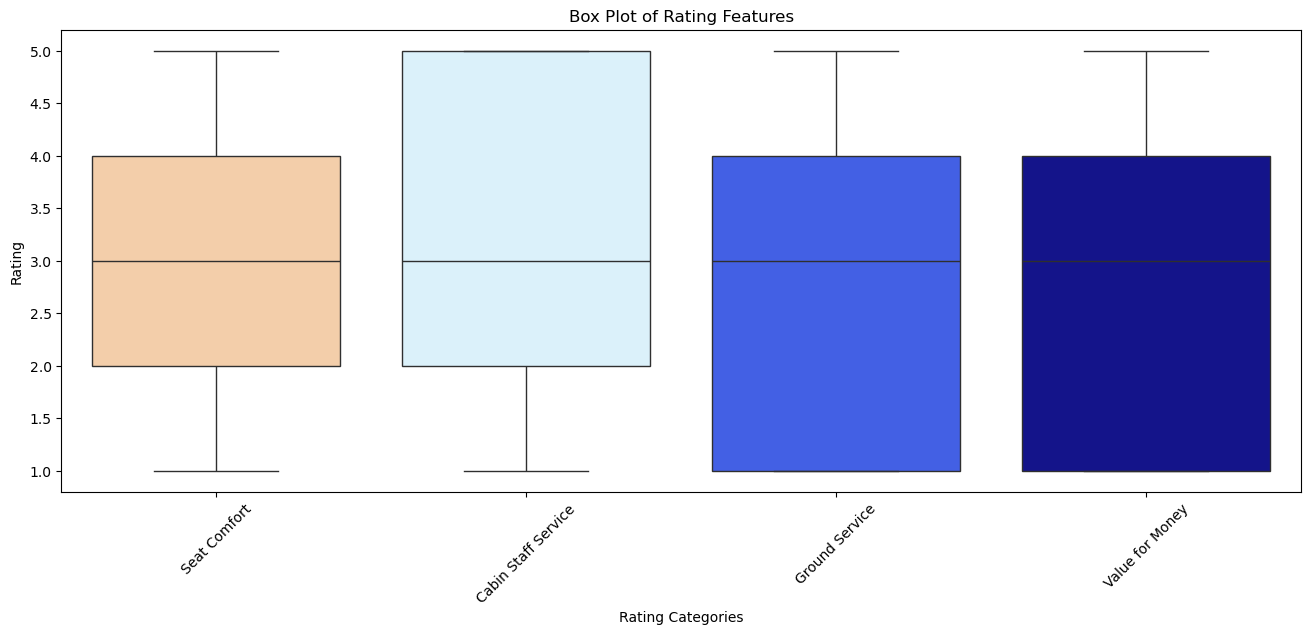

In [67]:
plot_rating_boxplots(df)

In [41]:
from gensim import corpora
from gensim.models import LdaModel

In [42]:
# Topic Modeling
# Create a dictionary and corpus for LDA
texts = [text.split() for text in df["cleaned"]]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display topics
print("\nLDA Topics:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


LDA Topics:
(0, '0.049*"to" + 0.040*"the" + 0.031*"i" + 0.025*"and" + 0.020*"a"')
(1, '0.055*"the" + 0.038*"and" + 0.037*"was" + 0.026*"to" + 0.025*"a"')
(2, '0.005*"tea" + 0.003*"and" + 0.002*"roll" + 0.002*"a" + 0.002*"insult"')
(3, '0.010*"she" + 0.005*"attendant" + 0.004*"pillow" + 0.004*"her" + 0.004*"child"')
(4, '0.054*"the" + 0.029*"and" + 0.028*"to" + 0.023*"a" + 0.020*"i"')


In [45]:
df.columns

Index(['Header', 'Author', 'Date Published', 'Review Body', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Ground Service', 'Value for Money', 'Recommended', 'Rating', 'cleaned',
       'lemmatized', 'polarity', 'subjectivity', 'sentiment', 'score'],
      dtype='object')

In [47]:
df['Seat Type'].unique()

array(['Economy Class', 'Business Class', 'Premium Economy',
       'First Class', nan], dtype=object)

/tmp/ipykernel_3648848/374925937.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Seat Type', y='Seat Comfort', ci=None)


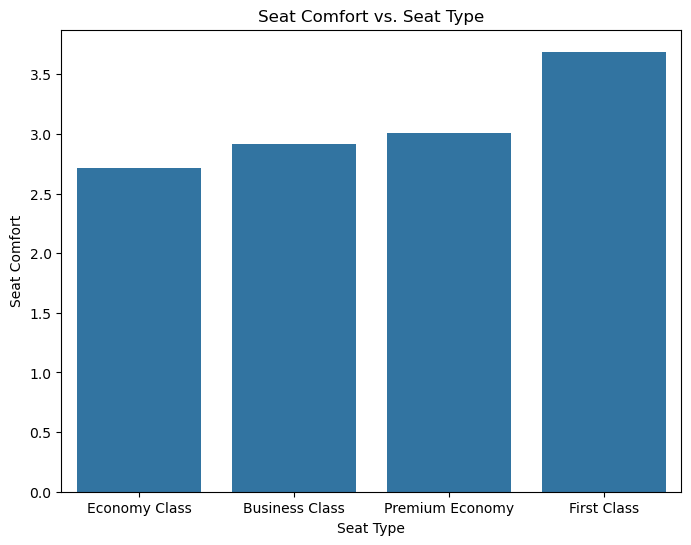

In [48]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Seat Type', y='Seat Comfort', ci=None)
plt.title('Seat Comfort vs. Seat Type')
plt.show()

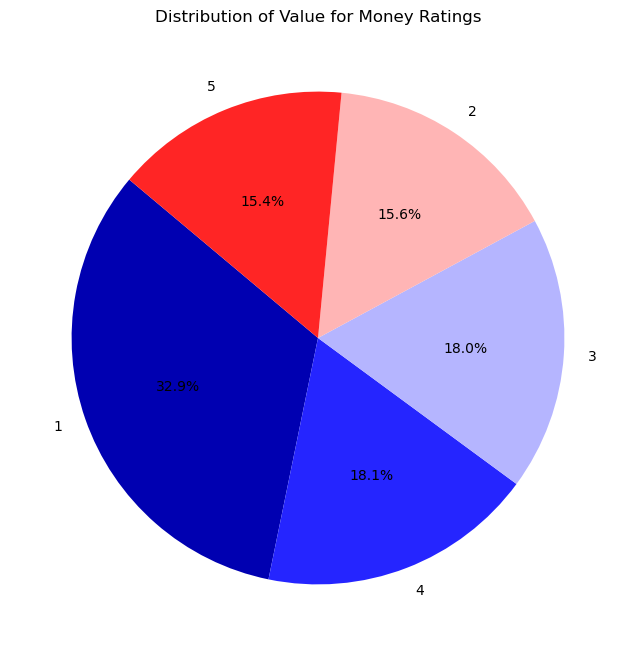

In [90]:
value_counts = df['Value for Money'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("seismic"))

# Add a title
plt.title('Distribution of Value for Money Ratings')

# Display the plot
plt.show()

/tmp/ipykernel_3648848/738709100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Value for Money', data=df, palette="winter")


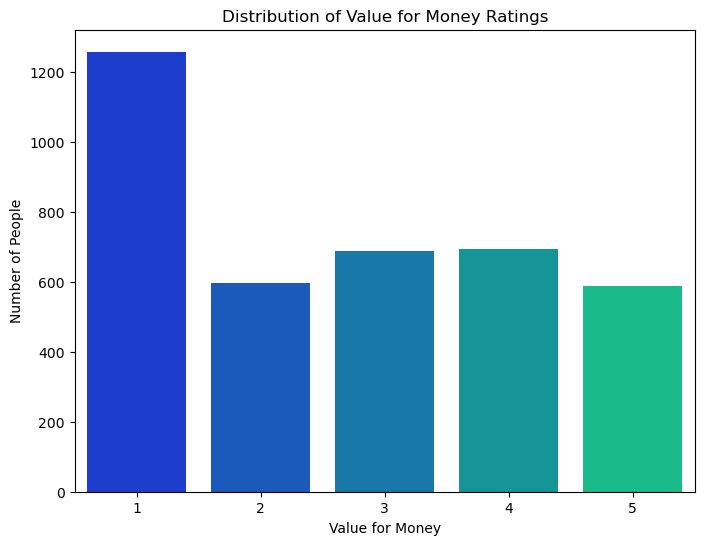

In [87]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Value for Money', data=df, palette="winter")

plt.title('Distribution of Value for Money Ratings')
plt.xlabel('Value for Money')
plt.ylabel('Number of People')
plt.show()

/tmp/ipykernel_3648848/2323725486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seat Type', y='Cabin Staff Service', data=df, palette="winter")


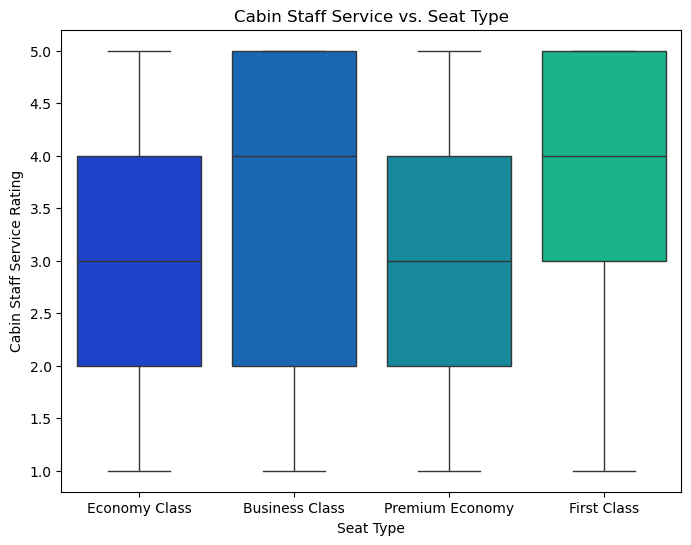

In [88]:
plt.figure(figsize=(8, 6))

# Box plot to compare Cabin Staff Service across Seat Types
sns.boxplot(x='Seat Type', y='Cabin Staff Service', data=df, palette="winter")

plt.title('Cabin Staff Service vs. Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Cabin Staff Service Rating')
plt.show()

/tmp/ipykernel_3648848/1948000915.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Seat Type', y='Cabin Staff Service', data=df, ci=None, palette="seismic")
/tmp/ipykernel_3648848/1948000915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seat Type', y='Cabin Staff Service', data=df, ci=None, palette="seismic")


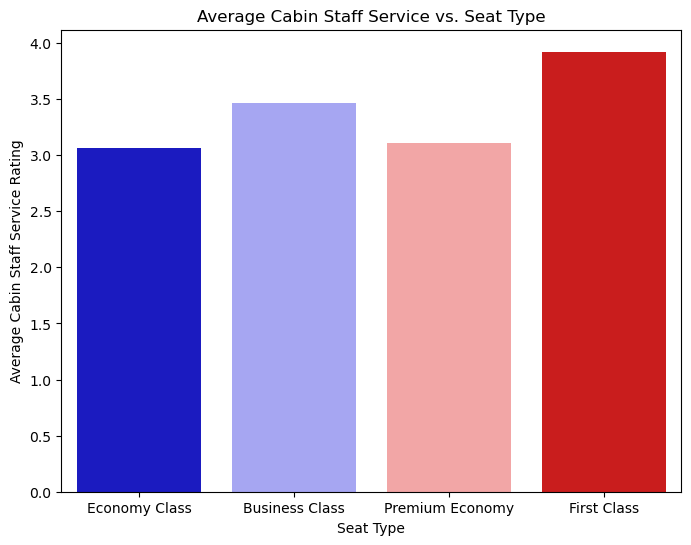

In [81]:
plt.figure(figsize=(8, 6))

# Bar plot to show average Cabin Staff Service rating for each Seat Type
sns.barplot(x='Seat Type', y='Cabin Staff Service', data=df, ci=None, palette="seismic")

plt.title('Average Cabin Staff Service vs. Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Average Cabin Staff Service Rating')
plt.show()

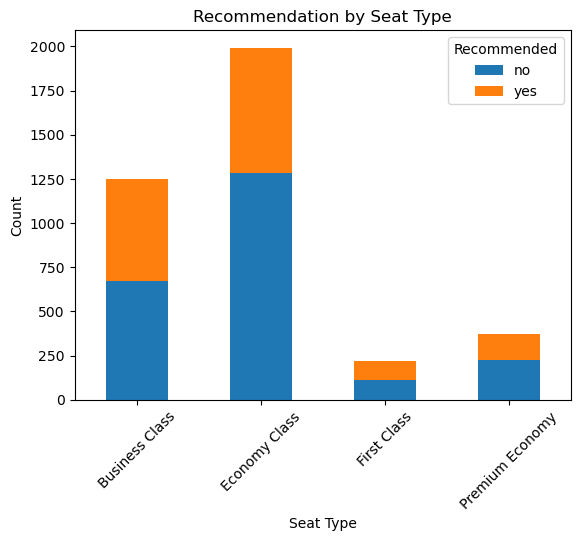

In [57]:
pd.crosstab(df['Seat Type'], df['Recommended']).plot(kind='bar', stacked=True)
plt.title('Recommendation by Seat Type')
plt.xlabel('Seat Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

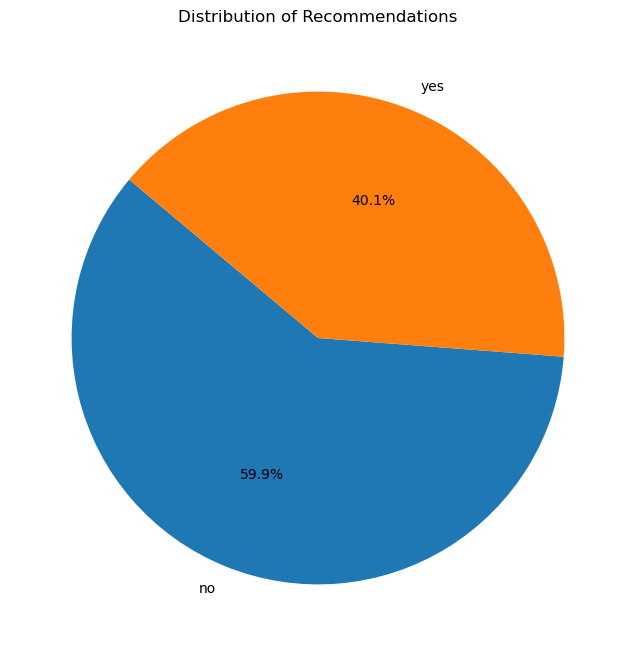

In [83]:
value_counts = df['Recommended'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Recommendations')

# Display the plot
plt.show()

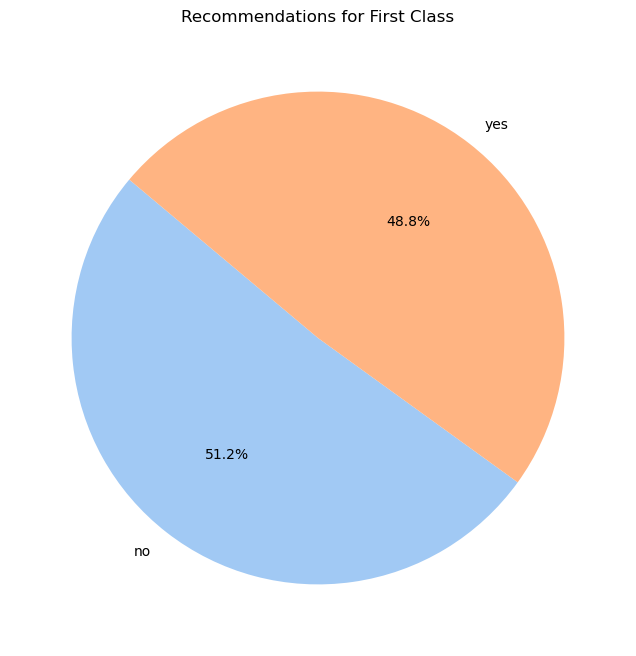

In [91]:
first_class_df = df[df['Seat Type'] == 'First Class']

# Plot a pie chart for recommendations
recommend_counts = first_class_df['Recommended'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Recommendations for First Class')
plt.show()

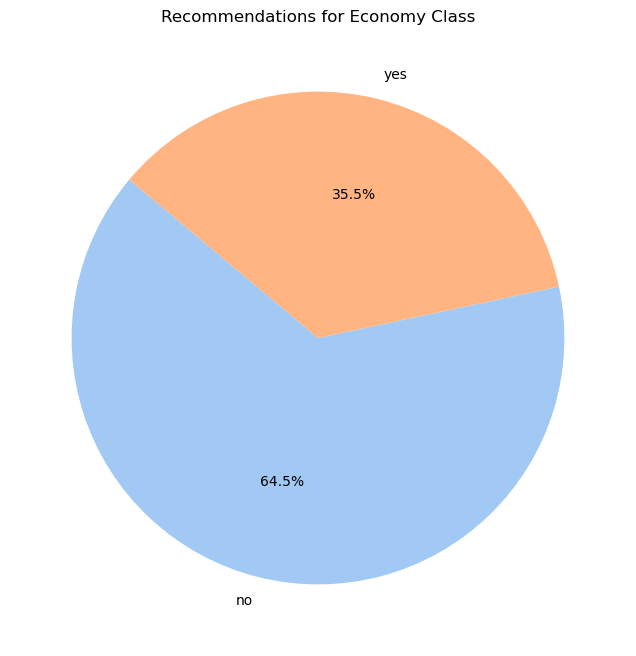

In [93]:
economy_class_df = df[df['Seat Type'] == 'Economy Class']

# Plot a pie chart for recommendations
recommend_counts = economy_class_df['Recommended'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Recommendations for Economy Class')
plt.show()

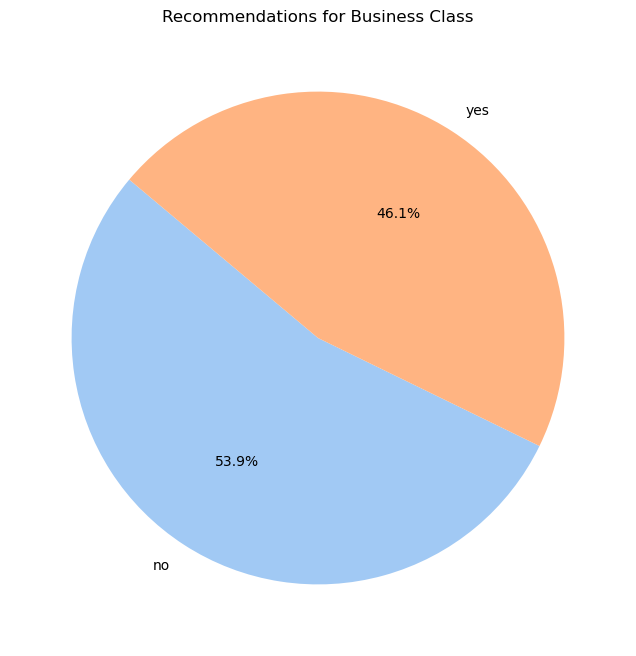

In [94]:
business_class_df = df[df['Seat Type'] == 'Business Class']

# Plot a pie chart for recommendations
recommend_counts = business_class_df['Recommended'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Recommendations for Business Class')
plt.show()

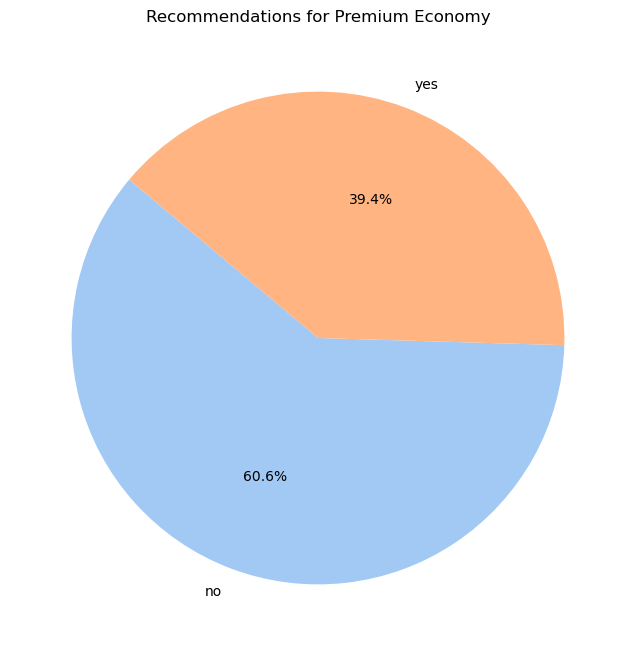

In [95]:
premium_economy_df = df[df['Seat Type'] == 'Premium Economy']

# Plot a pie chart for recommendations
recommend_counts = premium_economy_df['Recommended'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Recommendations for Premium Economy')
plt.show()